# GRIP_MAY21
### Author: Shrestha Agrawal

# TASK_2

### AIM: 
##### Prediction using Unsupervised ML

● From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

● Use R or Python to perform this task

### CONCEPT CLARITY

● Supervised machine learning algorithms uncover insights, patterns, and relationships from a labeled training dataset – that is, a dataset that already contains a known value for the target variable for each record. Because you provide the machine learning algorithm with the correct answers for a problem during training, the algorithm is able to “learn” how the rest of the features relate to the target, enabling you to uncover insights and make predictions about future outcomes based on historical data.
 
● Unsupervised machine learning algorithms infer patterns from a dataset without reference to known, or labeled, outcomes. Unlike supervised machine learning, unsupervised machine learning methods cannot be directly applied to a regression or a classification problem because you have no idea what the values for the output data might be, making it impossible for you to train the algorithm the way you normally would. Unsupervised learning can instead be used to discover the underlying structure of the data.

MODEL USED: K-means clustering is an unsupervised learning algorithm. Basically,it identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid. A cluster refers to a collection of data points aggregated together because of certain similarities.

### DATASET DESCRIPTION-

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

##### Variables Present:

1. sepal length (in cm)
2. sepal width (in cm)
3. petal length (in cm)
4. petal width (in cm)
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

###### 2.1 Import the Library

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

###### 2.2 Import the dataset and print it.

In [3]:
iris = pd.read_csv("C://Users//HP//Downloads//Iris.csv")
print("Dataset Imported Successfully.")

Dataset Imported Successfully.


In [4]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


###### 2.3 Dimensions of the Dataset

In [5]:
iris.shape 

(150, 6)

From the above code we see that ther are 150 rows and 6 columns in the given data.

###### 2.4 Summary of the Dataset

In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


We get to see that:
● The average Sepal length is 5.84 cm.
● The average Sepal width is 3.05 cm.
● The average Petal length is 3.75 cm.
● The average Petal width is 1.19 cm.
● The minimum Sepal length is 4.3 cm & the maximum Sepal length is 7.9 cm.
● The minimum Sepal width is 2 cm & the maximum Sepal width is 4.4 cm.
● The minimum Petal length is 1 cm & the maximum Petal length is 6.9 cm.
● The minimum Petal width is 0.1 cm & the maximum Petal width is 2.5 cm.

###### 2.5 Properties of the iris dataset

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


###### 2.6 Specific variable of interest.

In [8]:
#We will take "Species" as the variable of our interest.
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We got that there are 3 types of species.

In [9]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

###### 2.7 Making a list for saving the values of Within-Cluster sum of squares

In [17]:
wcss=[]  #WCSS=within cluster sum of square
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0,n_init=10,max_iter=300,)
    kmeans.fit(iris) #Train model and create classifier
    wcss.append(kmeans.inertia_) 

###### 2.8 Plotting the "Within-Cluster Sum of Squares"

Text(0.5, 1.0, 'Elbow Method')

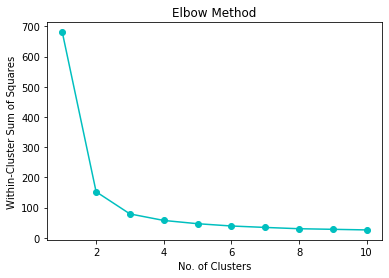

In [24]:
plt.plot(range(1,11),wcss,'ro-',color='c')
plt.xlabel("No. of Clusters")
plt.ylabel("Within-Cluster Sum of Squares")
plt.title("Elbow Method")

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

At the optimum number of clusters the WCSS does not decrease significantly with each iteration. The optimum number of cluster appears at the elbow point.
From the above graph it is clearly visible that 3 is the elbow point and so it should be equal to the optimum number of clusters for dataset.

###### 2.9 Applying K-means to our dataset.

In [27]:
kmeans= KMeans(init="k-means++",n_clusters=3, n_init=10, max_iter=300, random_state=0)
y_kmeans=kmeans.fit_predict(iris)
#y : cluster label
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

Here 0,1 and 2 are the labels of "Species" that are 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'.

###### 2.10 Visualization of the Data


Text(0.5, 1.0, 'K-Means Clustering')

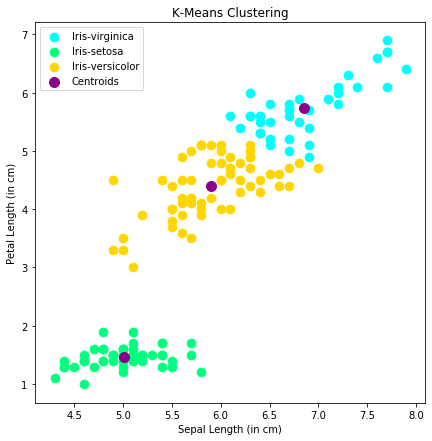

In [34]:
kmeans.cluster_centers_ # Centroids of clusters formed
plt.figure(figsize=(7,7))
plt.scatter(iris.iloc[y_kmeans==0,0],iris.iloc[y_kmeans==0,2],s=75,c='aqua',label='Iris-virginica')
plt.scatter(iris.iloc[y_kmeans==1,0],iris.iloc[y_kmeans==1,2],s=75,c='springgreen',label='Iris-setosa')
plt.scatter(iris.iloc[y_kmeans==2,0],iris.iloc[y_kmeans==2,2],s=75,c='gold',label='Iris-versicolor')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],s=100,c='darkmagenta',label='Centroids')
plt.legend()
plt.xlabel('Sepal Length (in cm)')
plt.ylabel('Petal Length (in cm)')
plt.title('K-Means Clustering')

From the above data we can clearly see the three clusters of the Iris dataset under species that are Iris-setosa', 'Iris-versicolor', 'Iris-virginica', and using it we are able to find out the sepal length and the petal length for a particular species.